# Analysis of Employee Attrition 

Sonali Shanbhag

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the dataset

In [2]:
dataset = pd.read_csv("Employee Data.csv")
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Exploratory Data Visualization

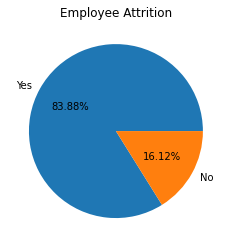

In [3]:
attrition_count = dataset['Attrition'].value_counts().to_numpy()
plt.pie(attrition_count, labels = dataset['Attrition'].unique(),autopct='%.2f%%')
plt.title('Employee Attrition')
plt.show()

An attrition rate of around 10% is an ideal figure, considering the 10% were part of the lowest performers. Losing high-engaging, high performing employees is definitely worrisome. This analytical study aims to figure out the most significant factors that push employees to leave, and subsequently allow the company to work on these areas to maintain an optimal employee retention rate. Since this company has a 16% attrition rate, it's important to analyze the data to see what can be done.  

In [4]:
correlation_matrix = dataset.drop(['Attrition','Over18', 'StandardHours', 'EmployeeCount','EmployeeNumber'], axis=1).corr()
correlation_matrix

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


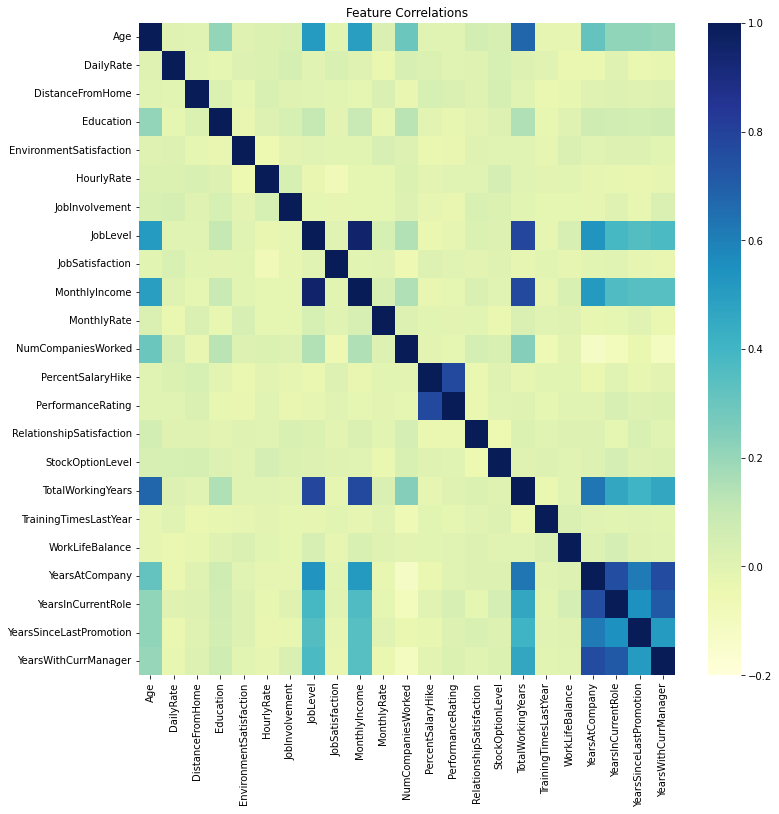

In [5]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(correlation_matrix, vmin=-0.2,cmap='YlGnBu')
ax.set_title('Feature Correlations')
plt.show(fig)

The heatmap helps understand the dependence of the features on one another. 


### Data Preprocessing

#### Remove irrelevant columns

In [6]:
irrelevant = ['Over18', 'StandardHours', 'EmployeeCount','EmployeeNumber']
dataset=dataset.drop(columns=irrelevant)

In [7]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### Check for missing values

In [8]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

No missing values.

#### Check for Numerical and Categorical Columns

In [9]:
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [10]:
numerical_columns = set(dataset.dtypes[dataset.dtypes=='int64'].index.values)
numerical_columns

{'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'}

In [11]:
categorical_columns = set(dataset.dtypes[dataset.dtypes=='object'].index.values)
for i in categorical_columns:
    print(i,':',dataset[i].unique(), 'index:',dataset.columns.get_loc(i) )

Gender : ['Female' 'Male'] index: 9
MaritalStatus : ['Single' 'Married' 'Divorced'] index: 15
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] index: 13
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] index: 7
Attrition : ['Yes' 'No'] index: 1
OverTime : ['Yes' 'No'] index: 19
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] index: 2
Department : ['Sales' 'Research & Development' 'Human Resources'] index: 4


#### Handle categorical data- Label Encoding Categorical Columns

In [12]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
le = LabelEncoder()

for i in categorical_columns:
    print('Label Encoding of', i,':')
    print(c(dataset[i]))
    dataset[i] = le.fit_transform(dataset[i])
    print(c(dataset[i]),"\n")

Label Encoding of Gender :
Counter({'Male': 882, 'Female': 588})
Counter({1: 882, 0: 588}) 

Label Encoding of MaritalStatus :
Counter({'Married': 673, 'Single': 470, 'Divorced': 327})
Counter({1: 673, 2: 470, 0: 327}) 

Label Encoding of JobRole :
Counter({'Sales Executive': 326, 'Research Scientist': 292, 'Laboratory Technician': 259, 'Manufacturing Director': 145, 'Healthcare Representative': 131, 'Manager': 102, 'Sales Representative': 83, 'Research Director': 80, 'Human Resources': 52})
Counter({7: 326, 6: 292, 2: 259, 4: 145, 0: 131, 3: 102, 8: 83, 5: 80, 1: 52}) 

Label Encoding of EducationField :
Counter({'Life Sciences': 606, 'Medical': 464, 'Marketing': 159, 'Technical Degree': 132, 'Other': 82, 'Human Resources': 27})
Counter({1: 606, 3: 464, 2: 159, 5: 132, 4: 82, 0: 27}) 

Label Encoding of Attrition :
Counter({'No': 1233, 'Yes': 237})
Counter({0: 1233, 1: 237}) 

Label Encoding of OverTime :
Counter({'No': 1054, 'Yes': 416})
Counter({0: 1054, 1: 416}) 

Label Encoding of

#### Split into Independent (Features) and Dependent Variables

In [13]:
X = dataset.iloc[: , dataset.columns != 'Attrition'].values
Y = dataset.iloc[: , 1 ].values

#### Label Encoding Dependent Variable

In [14]:
Y= le.fit_transform(Y) 
Y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

#### Split into train and test sets

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [16]:
x_train

array([[  37,    2, 1372, ...,   12,    5,    7],
       [  45,    0, 1195, ...,    8,   11,    8],
       [  28,    2, 1157, ...,    2,    2,    2],
       ...,
       [  44,    2, 1112, ...,    2,    0,    2],
       [  32,    2,  929, ...,    7,    0,    8],
       [  49,    2,  464, ...,    2,    2,    2]], dtype=int64)

In [17]:
y_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [18]:
x_test

array([[  50,    2,  939, ...,   11,    1,    5],
       [  26,    2, 1384, ...,    7,    0,    7],
       [  52,    1,  890, ...,    8,    0,    0],
       ...,
       [  25,    2, 1372, ...,    2,    1,    2],
       [  58,    0,  390, ...,    3,    1,    2],
       [  39,    1, 1218, ...,    8,    1,    6]], dtype=int64)

In [19]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1176, 30)
(1176,)
(294, 30)
(294,)


#### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###  Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=0)
regressor.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, regressor.predict(x_test))*100
print('Logistic Regression Accuracy: ',accuracy,'%')

Logistic Regression Accuracy:  86.39455782312925 %


### Random Forest Classifer

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Random Forest Accuracy:',accuracy_score(y_test, rf.predict(x_test))*100,'%')

Random Forest Accuracy: 86.05442176870748 %


### 10 Fold Cross Validation

In [25]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
results = model_selection.cross_val_score(RandomForestClassifier(), x_train, y_train, cv=kfold, scoring='accuracy')
print('10-Fold Cross Validation Average Accuracy: ' ,results.mean()*100,'%')

10-Fold Cross Validation Average Accuracy:  85.88729537882081 %


### Model Evaluation

#### Precision, Recall and F-Score

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       246
           1       0.73      0.23      0.35        48

    accuracy                           0.86       294
   macro avg       0.80      0.61      0.64       294
weighted avg       0.85      0.86      0.83       294



In [27]:
print(classification_report(y_test, regressor.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       246
           1       0.70      0.29      0.41        48

    accuracy                           0.86       294
   macro avg       0.79      0.63      0.67       294
weighted avg       0.85      0.86      0.84       294



### Confusion Matrix

In [28]:
import sklearn.metrics as metrics
y_pred = regressor.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)

array([[240,   6],
       [ 34,  14]], dtype=int64)

c:\users\sonali\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 1.0, 'Logistic Regression')

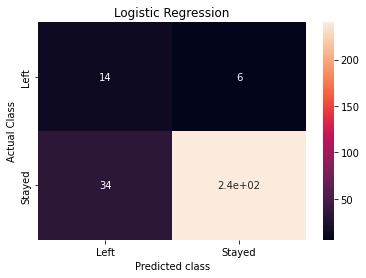

In [29]:
import seaborn as sns
regressor_cm = metrics.confusion_matrix(y_pred, y_test,[1,0])
sns.heatmap(regressor_cm, annot=True,xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('Actual Class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

This confusion matrix shows number of false positives, false negatives and accurate results. 
Using these values, 

Error Rate (FP+FN)/Total = 0.13 

Accuracy (TP+TN)/Total = 0.87 

### Data Visualization

#### Random Forest Feature Importance

In [30]:
feature_labels = np.array(['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()

Random Forest Feature Importance helps in the analysis of relevance and influence of features on the dependent variable. Through the importance percentage it is evident that the main causes cited by employees before resigning (in ascending order of impact) are:



In [31]:
for index in feature_indexes_by_importance:
    print('{}: {:.2f}% '.format(feature_labels[index], (importance[index] *100.0)))

PerformanceRating: 0.61% 
Gender: 0.88% 
BusinessTravel: 1.21% 
Department: 1.25% 
JobLevel: 1.73% 
Education: 2.08% 
RelationshipSatisfaction: 2.15% 
WorkLifeBalance: 2.35% 
EducationField: 2.36% 
MaritalStatus: 2.45% 
YearsInCurrentRole: 2.58% 
YearsSinceLastPromotion: 2.66% 
TrainingTimesLastYear: 2.69% 
StockOptionLevel: 2.71% 
NumCompaniesWorked: 2.83% 
JobSatisfaction: 2.88% 
JobRole: 3.06% 
JobInvolvement: 3.10% 
YearsWithCurrManager: 3.35% 
EnvironmentSatisfaction: 3.55% 
PercentSalaryHike: 3.74% 
YearsAtCompany: 4.11% 
DistanceFromHome: 4.63% 
HourlyRate: 5.02% 
TotalWorkingYears: 5.08% 
DailyRate: 5.42% 
OverTime: 5.45% 
MonthlyRate: 5.71% 
Age: 6.54% 
MonthlyIncome: 7.80% 


Visualizing this data will make it more understandable:

In [32]:
top_indices = (-importance).argsort()[:10]
top_features = np.take(feature_labels, top_indices)
top_importance = np.take(importance, top_indices)

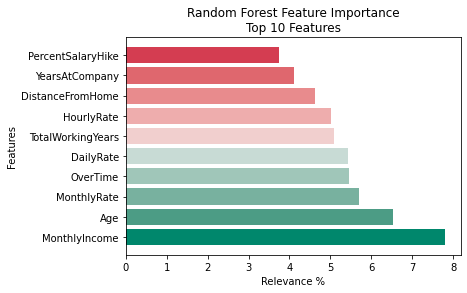

In [33]:
plt.barh(top_features, top_importance*100,color=['#00876c','#4c9c85','#78b19f','#a0c6b9','#c8dbd5','#f1cfce','#eeadad','#e88b8d','#df676e','#d43d51'])
plt.title('Random Forest Feature Importance\nTop 10 Features')
plt.xlabel('Relevance %')
plt.ylabel('Features')
plt.show()

Now that the main factors affecting attrition have been identified, an in-depth analysis of these will help get better insight into why employees are leaving and trends in these features. 

In [34]:
data = pd.read_csv('Employee Data.csv')
data = data.drop(columns=['Over18', 'StandardHours', 'EmployeeCount','EmployeeNumber'])
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [35]:
attrition_true = data.loc[data['Attrition']=='Yes']
attrition_false = data.loc[data['Attrition']=='No']

#### Analysis of Churned Employees

In [36]:
job_involvement = attrition_true['JobInvolvement'].value_counts().to_numpy()
performance_rating = attrition_true['PerformanceRating'].value_counts().to_numpy()

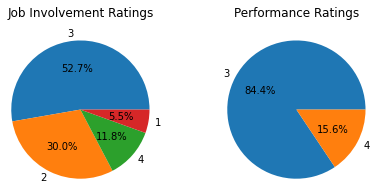

In [37]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=5)
ax1.pie(job_involvement, labels = dataset['JobInvolvement'].unique(),autopct='%.1f%%',radius=1.2)
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=5)
ax2.pie(performance_rating, labels = dataset['PerformanceRating'].unique(),autopct='%.1f%%',radius=1.2)
ax1.set_title('Job Involvement Ratings\n')
ax2.set_title('Performance Ratings\n')
plt.show()

#### Impact on the Company

Job Involvement Rating: The employee involvement rating is measured on a 4 point scale with 4 being the highest. Around 53% of employees who left were the most involved and dedicated employees. Hardly 6% of the churned employees were ones with low engagement and interest in work (1 rating). This is an issue for the company considering they're losing their valuable employees. 

Performance Rating: Only 15% of churned employees had the highest perfomance rating, majority were average performers.

#### Jobs with most Churned Employees

In [38]:
role_count = attrition_true['JobRole'].value_counts()[:9]
roles = ['Laboratory Technician', 'Sales Executive', 'Research Scientist', 'Sales Representative','Human Resources','Manufacturing Director','Healthcare Representative','Manager','Research Director']
role_count

Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: JobRole, dtype: int64

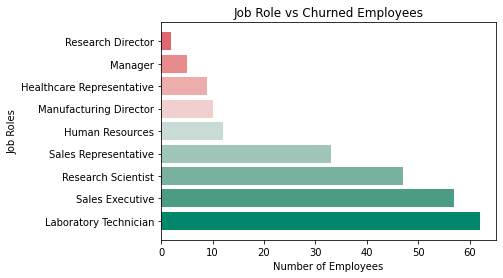

In [39]:
plt.title('Job Role vs Churned Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Job Roles')
plt.barh(roles,role_count,color=['#00876c','#4c9c85','#78b19f','#a0c6b9','#c8dbd5','#f1cfce','#eeadad','#e88b8d','#df676e','#d43d51'])
plt.show()

Laboratory Technicians, Sales Executives, Research Scientists and Sale Representatives are the Job Roles that have higher probability of attrition. Whereas Research Director, Manager, Healthcare Rep. and HR have the least probability of attrition.

In [40]:
dept_count = attrition_true['Department'].value_counts()
dept = ['Research & Development', 'Sales', 'Human Resources']

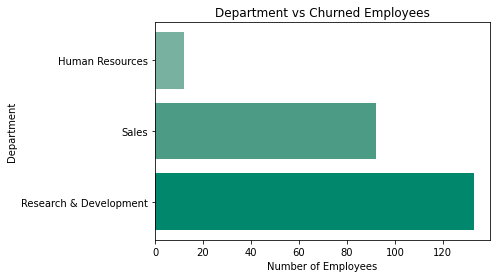

In [41]:
plt.title('Department vs Churned Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.barh(dept,dept_count,color=['#00876c','#4c9c85','#78b19f','#a0c6b9','#c8dbd5','#f1cfce','#eeadad','#e88b8d','#df676e','#d43d51'])
plt.show()

The HR department has least probability of attrition. 

#### Analysing Overtime

In [42]:
overtime_left = attrition_true['OverTime'].value_counts(normalize=True)*1470
overtime_left

Yes    787.721519
No     682.278481
Name: OverTime, dtype: float64

In [43]:
overtime_total = data['OverTime'].value_counts(normalize=True,ascending=True)*1470
overtime_total

Yes     416.0
No     1054.0
Name: OverTime, dtype: float64

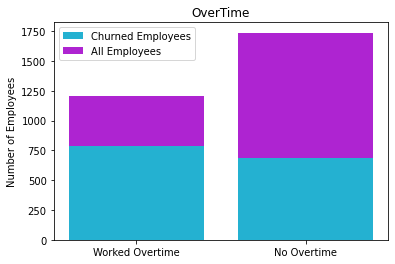

In [44]:
x = ['Worked Overtime', 'No Overtime']
plt.title('OverTime')
plt.ylabel('Number of Employees')
plt.bar(x, overtime_left,color='#24b1d1')
plt.bar(x, overtime_total, bottom=overtime_left, color= '#ae24d1')
plt.legend(["Churned Employees", "All Employees"])
plt.show()

Majority of employees who worked overtime left and most of the employees remaining in the company do not work overtime.

#### Analysing Salaries

In [45]:
print("Average Salary Data for Current Employees")
print('Monthly Income: ', attrition_false['MonthlyIncome'].mean())
print('Monthly Rate: ', attrition_false['MonthlyRate'].mean())
print('Daily Rate: ', attrition_false['DailyRate'].mean())
print('Hourly Rate: ', attrition_false['HourlyRate'].mean())
print("\nAverage Salary Data for Churned Employees")
print('Monthly Income: ', attrition_true['MonthlyIncome'].mean())
print('Monthly Rate: ', attrition_true['MonthlyRate'].mean())
print('Daily Rate: ', attrition_true['DailyRate'].mean())
print('Hourly Rate: ', attrition_true['HourlyRate'].mean())

Average Salary Data for Current Employees
Monthly Income:  6832.739659367397
Monthly Rate:  14265.779399837795
Daily Rate:  812.5044606650446
Hourly Rate:  65.9521492295215

Average Salary Data for Churned Employees
Monthly Income:  4787.0928270042195
Monthly Rate:  14559.308016877638
Daily Rate:  750.3628691983122
Hourly Rate:  65.57383966244726


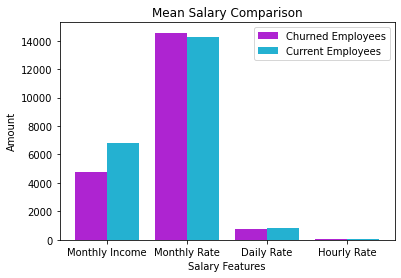

In [46]:
X = ['Monthly Income','Monthly Rate','Daily Rate','Hourly Rate']
Churn = [4787.0928270042195,14559.308016877638,750.3628691983122,65.57383966244726]
Current = [6832.739659367397,14265.779399837795,812.5044606650446,65.9521492295215]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Churn, 0.4, label = 'Churned Employees',color='#ae24d1')
plt.bar(X_axis + 0.2, Current, 0.4, label = 'Current Employees',color='#24b1d1')
  
plt.xticks(X_axis, X)
plt.xlabel("Salary Features")
plt.ylabel("Amount")
plt.title("Mean Salary Comparison")
plt.legend()
plt.show()

The #1 factor for employee attrition was Monthly Income. Since the churned employees have a lower monthly income compared to the currently working employees (on average), this could explain why employees are leaving.

#### Environment Satisfaction

In [47]:
attrition_true['EnvironmentSatisfaction'].value_counts()/237*100

1    30.379747
3    26.160338
4    25.316456
2    18.143460
Name: EnvironmentSatisfaction, dtype: float64

In [48]:
attrition_false['EnvironmentSatisfaction'].value_counts()/1233*100

3    31.711273
4    31.305758
2    19.789132
1    17.193836
Name: EnvironmentSatisfaction, dtype: float64

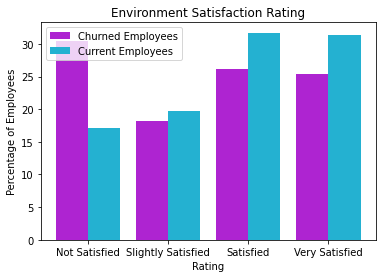

In [50]:
X = ['Not Satisfied','Slightly Satisfied','Satisfied','Very Satisfied']
Churn = [30.379747, 18.143460, 26.160338, 25.316456]
Current = [17.193836, 19.789132, 31.711273,31.305758]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Churn, 0.4, label = 'Churned Employees',color='#ae24d1')
plt.bar(X_axis + 0.2, Current, 0.4, label = 'Current Employees',color='#24b1d1')
  
plt.xticks(X_axis, X)
plt.xlabel("Rating")
plt.ylabel("Percentage of Employees")
plt.title("Environment Satisfaction Rating")
plt.legend()
plt.show()

Environment Satisfaction Rating is measured on a four point scale. More than 30% of churned employees gave the lowest possible rating (1= Not Satisfied) implying that many weren't happy with the physical setting, productivity rates or the general spirit of the workplace. 

In [62]:
gender_left = attrition_true['Gender'].value_counts()/237*100
gender_left

Male      63.291139
Female    36.708861
Name: Gender, dtype: float64

In [64]:
gender_total = data['Gender'].value_counts()/1470*100
gender_total

Male      60.0
Female    40.0
Name: Gender, dtype: float64

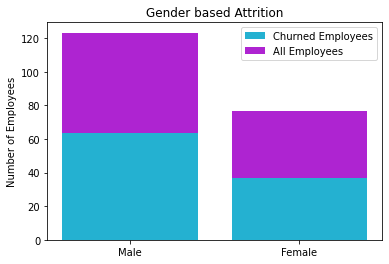

In [71]:
x = ['Male', 'Female']
plt.title('Gender based Attrition')
plt.ylabel('Number of Employees')
plt.bar(x, gender_left,color='#24b1d1')
plt.bar(x, gender_total, bottom=gender_left, color= '#ae24d1')
plt.legend(["Churned Employees", "All Employees"])
plt.show()

### Summary

Preferred Model is *Logistic Regression*, with an accuracy of *86.39%*

##### Top Features affecting Employee Attrition:
    
a. *Monthly Income, Monthly Rate, Daily Rate, Hourly Rate*: It is recommended that the Accounting and HR Department attend to these grievances; introducing performance based compensation (if the budget allows for it) could keep the employees engaged and involved.
    
b. *Overtime*: Employees working overtime have a higher tendency to leave. This could be because of lack of compensation for working overtime. The company should allocate resources to look into this issue. 

c. *Age, Years at Company, Total Working Years*: Older employees almost always have higher Job Levels and Years with Company and also Monthly Incomes (shown by a lighter colour implying positive correlation, direct proportionality => older the employee, higher the job level), however with an increase in age there is also a positive correlation shown between Age and Years since Last Promotion and a negative correlation with Percent Salary Hike. This could be a possible explanation why Age is one of the most significant variables. In simple words, more experienced employees are probably being passed over for promotions and salary hikes by their younger counterparts. 
    
d. *Department and Job-Role*: The Sales and R&D Departments have very high churn rates, since Sales Executive and Lab Technician are the two job roles that have seen the most resignations. The company should look into the working of these departments especially analyzing the work environment. The HR Department is doing quite well in this regard.

e. *Environment Satisfaction*: More than a third of the churned employees gave the company the lowest possible rating for environment satisfaction. Resources should be allocated to figuring out exactly what has led to their dissatisfaction and steps that should be taken for the betterment of the workplace.